In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
OrigImg ='/content/drive/My Drive/Colab Notebooks/LARP_ASS1/Rect29.jpg'

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

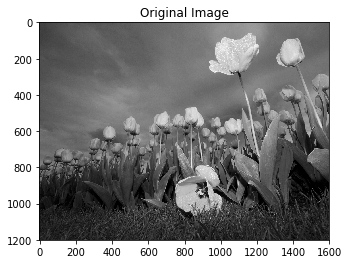

In [5]:
img = mpimg.imread(OrigImg)     
img.shape
gray = rgb2gray(img)
gray=np.matrix(gray)
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
plt.title('Original Image')
plt.show()
plt.show()
A=gray

In [6]:
X=np.transpose(A)@A
X.shape

(1600, 1600)

In [7]:
eigvals, eigvecs = np.linalg.eigh(X)
Sigma =  np.diag(eigvals[::-1])
V = eigvecs[:,::-1]
V_inv = np.linalg.inv(V)
U=V
U_inv=V_inv
Sigma.shape
U.shape
type(U)

numpy.matrix

In [0]:
def pseudoinv(A):
  B= np.matmul(np.transpose(A),A)
  C=np.linalg.inv(B)
  F=np.transpose(A)
  L=np.dot(C,F)
  return(L)

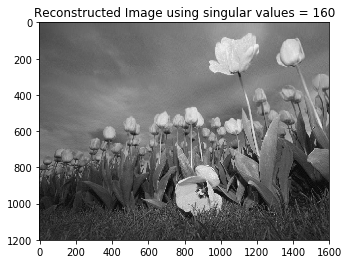

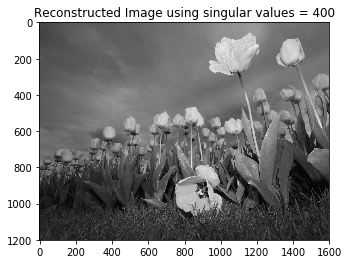

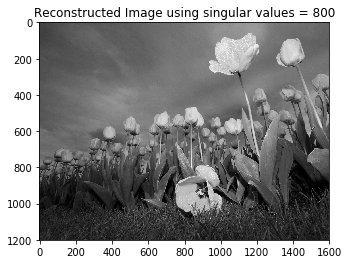

In [9]:
for i in [160, 400, 800]:
  E = V[:,:i]@Sigma[:i,:i]@V_inv[:i,:] #reconstruction
  A_pinv=pseudoinv(np.transpose(A))
  A_approx=A_pinv@E
  plt.imshow(A_approx, cmap='gray')
  title = "Reconstructed Image using singular values = %s" % i
  plt.title(title)
  plt.show()

In [10]:
A_pinv.shape

(1200, 1600)

reconEr 13186.685457797235


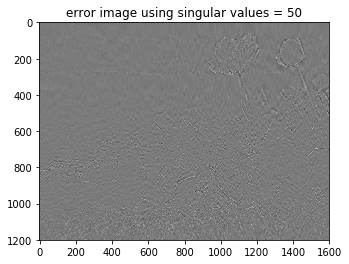

reconEr 9143.8948855169


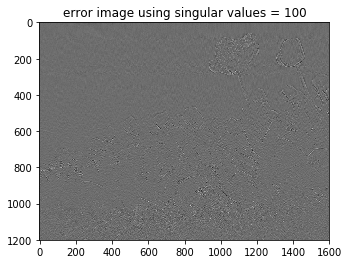

reconEr 6685.489373178591


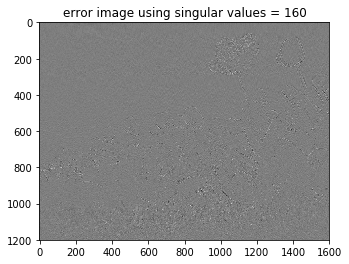

reconEr 5615.266656119001


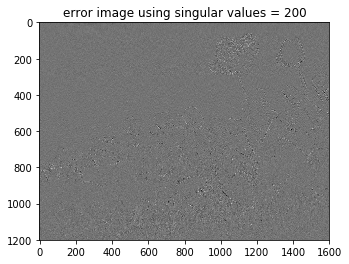

reconEr 4606.388848862351


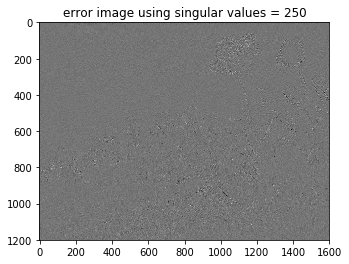

reconEr 3567.6209562908725


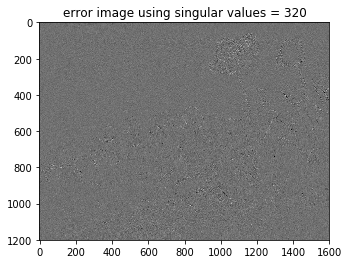

reconEr 2711.7191696585037


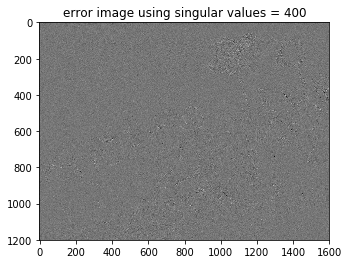

reconEr 660.0320074834382


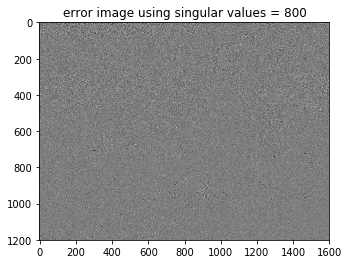

reconEr 312.65611508697486


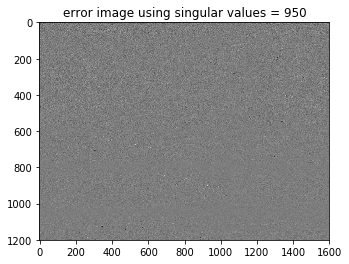

reconEr 2.010066888319597


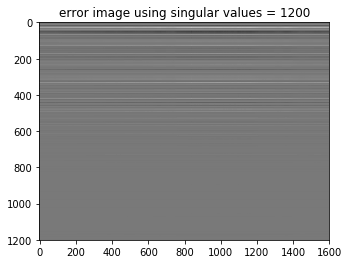

In [11]:
ER=[]
N=[]
j=0
for i in [50,100,160,200,250,320, 400, 800,950,1200]:
  E = V[:,:i]@Sigma[:i,:i]@V_inv[:i,:] #reconstruction
  A_pinv=pseudoinv(np.transpose(A))
  A_approx=A_pinv@E
  error=gray-A_approx
  reconErr=np.linalg.norm(error,'fro')
  ER.append(reconErr)
  N.append(i)
  print('reconEr',reconErr)

  plt.imshow(error, cmap='gray')
  title = "error image using singular values = %s" % i
  plt.title(title)
  plt.show()

In [12]:
N


[50, 100, 160, 200, 250, 320, 400, 800, 950, 1200]

Text(0, 0.5, 'Error')

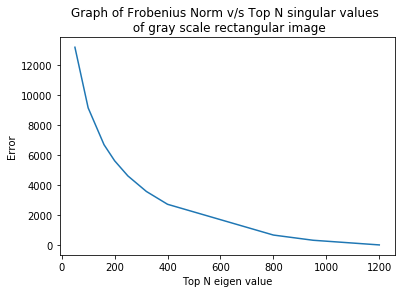

In [13]:
plt.plot(N, ER)
plt.title('Graph of Frobenius Norm v/s Top N singular values \n of gray scale rectangular image')
plt.xlabel('Top N eigen value')
plt.ylabel('Error')    
# plt.ylim(0,100)   
     
      
       
         

In [0]:
#random singular vector

randi=random.sample(range(1, 1600), 160)
P=[]
D=[]
P_inv=[]
# index=0
for i in randi:
  tempP=np.squeeze(np.array(U[:,i]))
  tempP_inv=np.squeeze(np.array(U_inv[i,:]))
  tempD=(Sigma[i,i])
  P.append(tempP)
  P_inv.append(tempP_inv)
  D.append(tempD)

  

In [35]:
P=np.transpose(np.array(P))
P_inv=np.array(P_inv)
D=np.array(D)
print(D.shape)
D=np.diag(D)


(160,)


In [36]:

print('D',D.shape)
print('P',P.shape)
print('P_inv',P_inv.shape)

D (160, 160)
P (1600, 160)
P_inv (160, 1600)


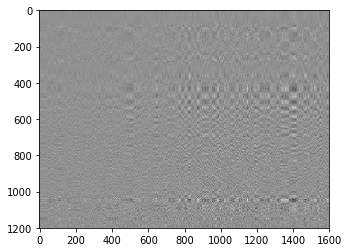

In [37]:
J=P@D@P_inv
A_pinv=pseudoinv(np.transpose(A))
A_rand=A_pinv@J
plt.imshow(A_rand, cmap='gray')

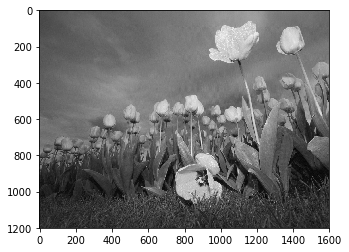

In [38]:
S=A-A_rand
plt.imshow(S, cmap='gray')